# Süperpozisyon

Bu bölümde, **Hadamard kapısı** ile qubit’in süperpozisyon durumuna nasıl getirildiğini göstereceğiz.  

**Süperpozisyon**, qubit’in aynı anda birden fazla durumda bulunabilmesi anlamına gelir.  

Klasik bilgisayarda bir bit yalnızca **0** veya **1** değerini alabilir.  
Fakat qubit, ölçüm yapılana kadar bu iki durumun birleşiminde bulunur.  

Bu özellik, **kuantum paralelliği** sağlar. Yani bir kuantum algoritması aynı anda birçok olası girdiyi işleyebilir.  

### Örnek

- **Klasik bit:** 0 veya 1  
- **Qubit (dengeli süperpozisyon):**

$$
|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
$$

Bu durumda ölçüm yapıldığında, qubit %50 olasılıkla $|0\rangle$,  
%50 olasılıkla $|1\rangle$ sonucunu verir.

In [1]:
# Qiskit’in temel bileşenlerini içe aktar
from qiskit import *

In [2]:
# AerSimulator: Qiskit Aer modülünün sağladığı kuantum devre simülatörü
# Gerçek cihaz olmadan devreleri bilgisayarda çalıştırmak için kullanılır
from qiskit_aer import AerSimulator

In [3]:
# Ölçüm sonuçlarını histogram olarak görselleştirmek için
from qiskit.visualization import plot_histogram  

In [4]:
# 1 qubit ve 1 klasik bitten oluşan kuantum devresi oluşturma
CircuitS = QuantumCircuit(1,1)

In [5]:
# Hadamard kapısı uygula: |0> → (|0> + |1>)/√2
CircuitS.h(0)

### Süperpozisyon Devre Diyagramı

Hadamard kapısı (H), başlangıçtaki $|0\rangle$ durumunu 
dengeli süperpozisyona dönüştürür:  

$$
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$


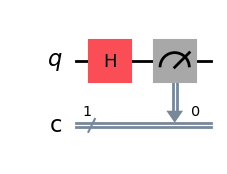

In [6]:
# Ölçüm ekle
CircuitS.measure(0, 0)
# Görselleştir 
CircuitS.draw("mpl")

In [7]:
# Qiskit Aer tarafından sağlanan simülatör tanımlanıyor
# Gerçek kuantum cihazı yerine devreyi bilgisayar üzerinde çalıştıracağız
simulator = AerSimulator()

In [8]:
# Kuantum devresi, simülatöre uygun şekilde derleniyor
compiled_circuit = transpile(CircuitS, simulator)

In [9]:
# Derlenmiş devre, 1000 shot ile simülatörde çalıştırılıyor
# Shots=1000 → aynı devre 1000 kez tekrar ölçülür, olasılık dağılımı elde edilir
sim_result = simulator.run(compiled_circuit, shots=1000).result()

In [10]:
# Ölçüm sonuçları sayısal olarak alınıyor (örn: {'0': 502, '1': 498})
counts = sim_result.get_counts()

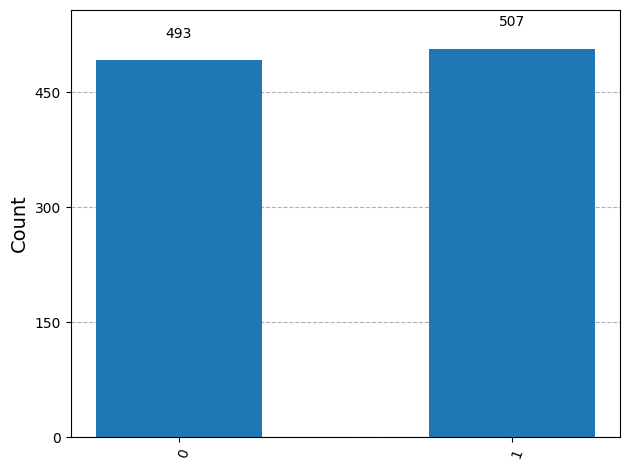

In [11]:
# Ölçüm sonuçları histogram olarak görselleştiriliyor
plot_histogram(counts)

### Ölçüm Sonuçlarının Histogramı

Sonuçlar yaklaşık olarak %50 $|0\rangle$ ve %50 $|1\rangle$ şeklinde dağılmıştır.  
Bu dağılım, süperpozisyonun teorik olarak öngördüğü davranışı doğrulamaktadır.  
İdeal durumda sonuçlar tam %50–%50 olmalıdır, ancak simülasyonun rastgeleliğinden dolayı küçük sapmalar olabilir.